In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

%matplotlib inline

In [7]:
#load data: col0=wavelength (A), col1=flux, col2=flux_error
tstSpec=np.loadtxt('test_spectrum.txt').T 
#Transpose to make axis0 select a column (wavelenght/flux) rather than a specific wavelength

<Container object of 3 artists>

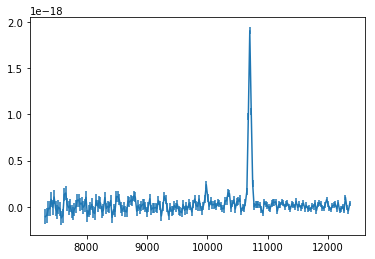

In [9]:
#see what we have
plt.errorbar(tstSpec[0],tstSpec[1],yerr=tstSpec[2])

In [10]:
#define gaussian used for fitting
def gaus(x,f0,mu,sig):
    return f0*np.exp(-(x-mu)**2/(2*sig*sig))

In [12]:
#fit the data, save best fit parameters and covariance matrix
bfpars,covar=opt.curve_fit(gaus,tstSpec[0],tstSpec[1],p0=[2e-18,10700.,100.],sigma=tstSpec[2])

(10485.042857527818, 10922.446388217357)

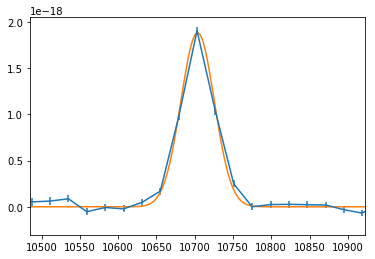

In [18]:
#define higher resolution wavelength grid to plot a curvy gaussian
x=np.linspace(bfpars[1]-10*bfpars[2],bfpars[1]+10*bfpars[2],1000)

#plot the best fit and zoom in on the line
plt.errorbar(tstSpec[0],tstSpec[1],yerr=tstSpec[2])
plt.plot(x,gaus(x,bfpars[0],bfpars[1],bfpars[2]))
plt.xlim(bfpars[1]-10*bfpars[2],bfpars[1]+10*bfpars[2])

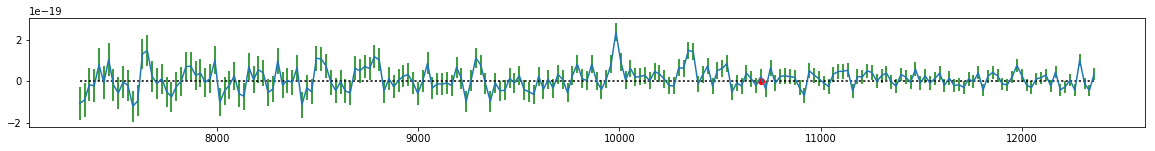

In [53]:
#plot the residuals
#make the plot really wide so you can see details
plt.figure(figsize=(20, 2))
plt.errorbar(tstSpec[0],(tstSpec[1]-gaus(tstSpec[0],bfpars[0],bfpars[1],bfpars[2])),yerr=tstSpec[2],ecolor='g')
plt.plot([min(tstSpec[0]),max(tstSpec[0])],[0,0],'k:')
plt.plot([bfpars[1]],[0],'ro')